In [13]:
import numpy as np
from h5netcdf import File
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from lgmr_em import data_utils, plot_utils

In [ ]:
proxydb = File("../data/LGMR/proxyDatabase.nc", "r", decode_vlen_strings=True)
print(proxydb.keys())

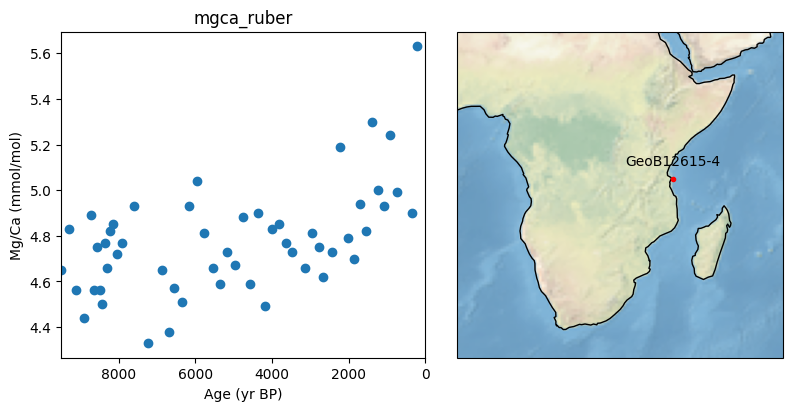

In [22]:
def plot_proxies(proxydb, site_name, proxy_names):
    n = len(proxy_names)

    label_dict = {
        "d18o": r"$\delta^{18}$O (‰)",
        "mgca": "Mg/Ca (mmol/mol)",
        "uk37": r"U$^k_{37}$",
        "tex86": r"TEX$_{86}$",
    }

    site = proxydb[site_name]
    lat, lon = site.attrs["latitude"], site.attrs["longitude"]
    site_data = site["data"]
    age = site_data["age_median"][...]
    upper_boundary = data_utils.DEGLACIAL_INTERGLACIAL_BOUNDARY
    lower_boundary = 0

    fig = plt.figure(figsize=(4 * 2, 4 * n), constrained_layout=True)
    gs = fig.add_gridspec(n, 2, width_ratios=[1, 1])

    geoaxe = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())
    a, b = 10, 3
    geoaxe.set_extent(
        [
            (lon // a - b) * a,
            (lon // a + b) * a,
            (lat // a - b) * a,
            (lat // a + b) * a,
        ],
        ccrs.PlateCarree(),
    )
    geoaxe.stock_img()
    geoaxe.add_feature(cfeature.LAND)
    geoaxe.add_feature(cfeature.COASTLINE)
    geoaxe.plot(lon, lat, markersize=3, marker="o", color="r")
    geoaxe.annotate(
        site.attrs["site_name"],
        xy=(lon, lat),
        xytext=(0, 10),
        textcoords="offset points",
        horizontalalignment="center",
    )

    for i, proxy_name in enumerate(proxy_names):
        v = site_data[proxy_name][...]
        v = v[(age >= lower_boundary) & (age <= upper_boundary)]

        ax = fig.add_subplot(gs[i, 0])
        ax.plot(age[(age >= lower_boundary) & (age <= upper_boundary)], v, "o")
        ax.set_xlim(lower_boundary, upper_boundary)
        ax.invert_xaxis()
        if data_utils.proxy_temp_correlation(proxy_name) == -1:
            ax.invert_yaxis()
        ax.set_xlabel("Age (yr BP)")

        ax.set_ylabel(label_dict[proxy_name.split("_")[0]])
        ax.set_title(proxy_name)

for site_name, proxy_names in {
    "so90-63ka": ("d18o_ruber",),
    "niop-c2_905_pc": ("tex86", "uk37"),
    "geob12605-3": ("d18o_ruber", "mgca_ruber", "d18o_dutertrei"),
    "geob12610-2": ("d18o_ruber", "mgca_dutertrei", "d18o_dutertrei", "mgca_ruber"),
    "geob12615-4": ("mgca_ruber",),
    "gik16160-3": ("d18o_ruber", "mgca_ruber"),
    "geob9307-3": ("d18o_ruber", "mgca_ruber"),
    "geob9310-4": ("d18o_ruber", "mgca_ruber"),
    "sk237-gc04": ("d18o_ruber", "mgca_ruber"),
    "so189-039kl": ("d18o_ruber", "mgca_ruber"),
    "so189-144kl": ("d18o_ruber"),
    "bj8-03_70ggc": ("d18o_ruber", "mgca_ruber"),
    "fan17": ("d18o_ruber_pink", "mgca_ruber_pink"),
    "geob1023-5": ("d18o_inflata", "uk37"),
    "geob4905-4": ("d18o_ruber_pink", "mgca_ruber_pink"),
    "geob6518-1": ("d18o_ruber",),
    "md03-2707": ("d18o_ruber_pink", "mgca_ruber_pink"),
    "odp_175-1084b": ("mgca_bulloides"),
    "md02-2575": ("d18o_peregrina", "mgca_ruber"),
    "so164-03-4": ("d18o_ruber", "mgca_ruber"),
    "geob3129-1": ("d18o_ruber", "d180_ruber_pink", "d18o_sacculifer", "mgca_ruber"),
    "geob3910-2": ("d180_sacculifer", "d180_tumida"),
    "m35003-4": ("d18o_ruber_pink", "uk37"),
    "pl07-39pc": (
        "d18o_ruber",
        "mgca_ruber",
        "d18o_ruber_pink",
        "d18o_bulloides",
        "d18o_dutertrei",
    ),
    "vm12-107": ("mgca_ruber",),
    "odp_167-1019c": ("uk37", "d18o_bulloides"),
    "mv99-pc14": ("mgca_bulloides"),
    "md02_2529": ("d18o_ruber", "uk37"),
    "me0005a-43jc": ("d18o_dutertrei", "d18o_ruber", "mgca_ruber"),
    "odp202-1240": ("d18o_ruber", "mgca_ruber"),
    "tr163-22": ("d18o_ruber", "mgca_ruber"),
    "vm21-30": ("d18o_ruber", "d18o_sacculifer", "mgca_sacculifer"),
    "m77-2-056-5": ("d18o_dutertrei", "mgca_dutertrei"),
    "m77-2-059-1": ("d18o_dutertrei", "mgca_dutertrei", "uk37"),
    "m77_2_003-2": ("uk37",),
    "m135-005-3": ("uk37",),
    "pc01": ("uk37",),
    "gik17051-3": ("d18o_bulloides", "d18o_pachyderma"),
    "knr166-14_11jpc": ("d18o_bulloides", "d18o_pachyderma"),
    "md95-2024":("d18o_bulloides", "mgca_bulloides"),
    "md99-2251": ("mgca_bulloides",),
    "md03-2699": ("uk37",),
    "geob33131": ("uk37",),
    

}.items():
    plot_proxies(site_name, proxy_names)